In [9]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
# Load the diabetes dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing setså
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train and evaluate without scaling
model.fit(X_train, y_train)
y_pred_no_scaling = model.predict(X_test)
mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate with StandardScaler
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

# Scale the data using MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Train and evaluate with MinMaxScaler
model.fit(X_train_minmax, y_train)
y_pred_minmax = model.predict(X_test_minmax)
mse_minmax = mean_squared_error(y_test, y_pred_minmax)

# Results
print(f'Mean Squared Error without scaling: {mse_no_scaling:.2f}')
print(f'Mean Squared Error with StandardScaler: {mse_scaled:.2f}')
print(f'Mean Squared Error with MinMaxScaler: {mse_minmax:.2f}')

Mean Squared Error without scaling: 2900.19
Mean Squared Error with StandardScaler: 2900.19
Mean Squared Error with MinMaxScaler: 2900.19


In [ ]:
from sklearn.datasets import load_boston_ho

ImportError: cannot import name 'load_boston_housing' from 'sklearn.datasets' (/Users/I751244/Desktop/mytutoring/ds101_2024Oct/venv/lib/python3.8/site-packages/sklearn/datasets/__init__.py)

Mean Squared Error (MSE): 1.29233144408073
R-squared (R2): 0.01379533753228468


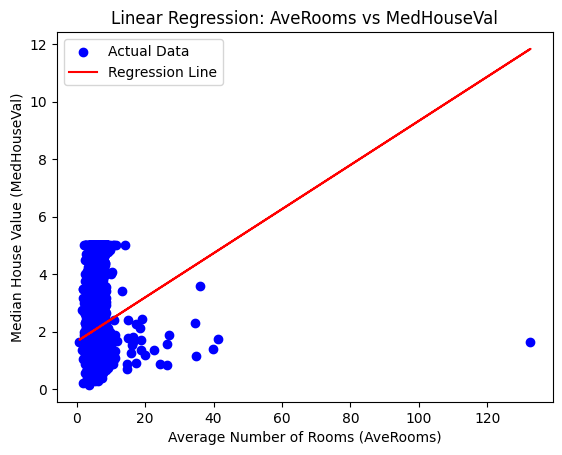

In [10]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

# California Housing 데이터셋 로드
california = fetch_california_housing()

# 데이터프레임으로 변환
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target  # 타겟 변수 추가

# 'AveRooms' (평균 방 개수)을 독립변수로, 'MedHouseVal' (주택 중간 가격)을 종속변수로 설정
X = df[['AveRooms']]  # 독립 변수: 평균 방 개수
y = df['MedHouseVal']  # 종속 변수: 주택 중간 가격

# 데이터를 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# 회귀선 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # 실제 데이터
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # 회귀 직선
plt.title('Linear Regression: AveRooms vs MedHouseVal')
plt.xlabel('Average Number of Rooms (AveRooms)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.legend()
plt.show()

In [14]:
import pandas as pd
from sklearn.datasets import load_wine

# 와인 데이터셋 로드
wine = load_wine()
X = wine.data  # feature 데이터
y = wine.target  # target 데이터

# color_intensity 특성 이산화
color_intensity = X[:, 9]  # color_intensity feature

# pd.cut을 사용하여 3개의 구간으로 나누기
color_bins = [0, 3, 6, 10]  # color intensity에 대한 구간
color_labels = ['Low', 'Medium', 'High']  # 각 구간의 이름

# color intensity 이산화
color_discretized = pd.cut(
    color_intensity, bins=color_bins, labels=color_labels, right=False)

# flavanoids 특성 이산화
flavanoids = X[:, 6]  # flavanoids feature

# pd.cut을 사용하여 4개의 구간으로 나누기
flavanoids_bins = [0, 1, 2, 3, 5]  # flavanoids에 대한 구간
flavanoids_labels = ['Very Low', 'Low', 'Medium', 'High']  # 각 구간의 이름

# flavanoids 이산화
flavanoids_discretized = pd.cut(
    flavanoids, bins=flavanoids_bins, labels=flavanoids_labels, right=False)

# 결과 출력 (pd.Series로 변환 후 head() 사용)
print("Discretized Color Intensity Values:")
print(pd.Series(color_discretized).head())
print("\nDiscretized Flavanoids Values:")
print(pd.Series(flavanoids_discretized).head())

Discretized Color Intensity Values:
0    Medium
1    Medium
2    Medium
3      High
4    Medium
dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Discretized Flavanoids Values:
0      High
1    Medium
2      High
3      High
4    Medium
dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'Medium' < 'High']
